In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

from lbg_forecast.sps import simulate_sed
from lbg_forecast.sps import initialise_sps_model
from lbg_forecast.sps import update_sps_model
from lbg_forecast.sps import plot_sed
from lbg_forecast.sps import plot_lsst_filters
from lbg_forecast.sps import simulate_photometry_lsst_fsps
from lbg_forecast.sps import simulate_photometry_lsst
from lbg_forecast.popmodel import galaxy_population_model

In [3]:
sps_model = initialise_sps_model(dust_type=2)

In [4]:
sps_params = galaxy_population_model(np.array([3]))
update_sps_model(sps_model, sps_params)

In [5]:
simulate_photometry_lsst_fsps(sps_model, mass=sps_params["mass"])

array([21.53578385, 19.88183203, 19.90576496, 19.93343739, 19.94981613,
       20.02274665])

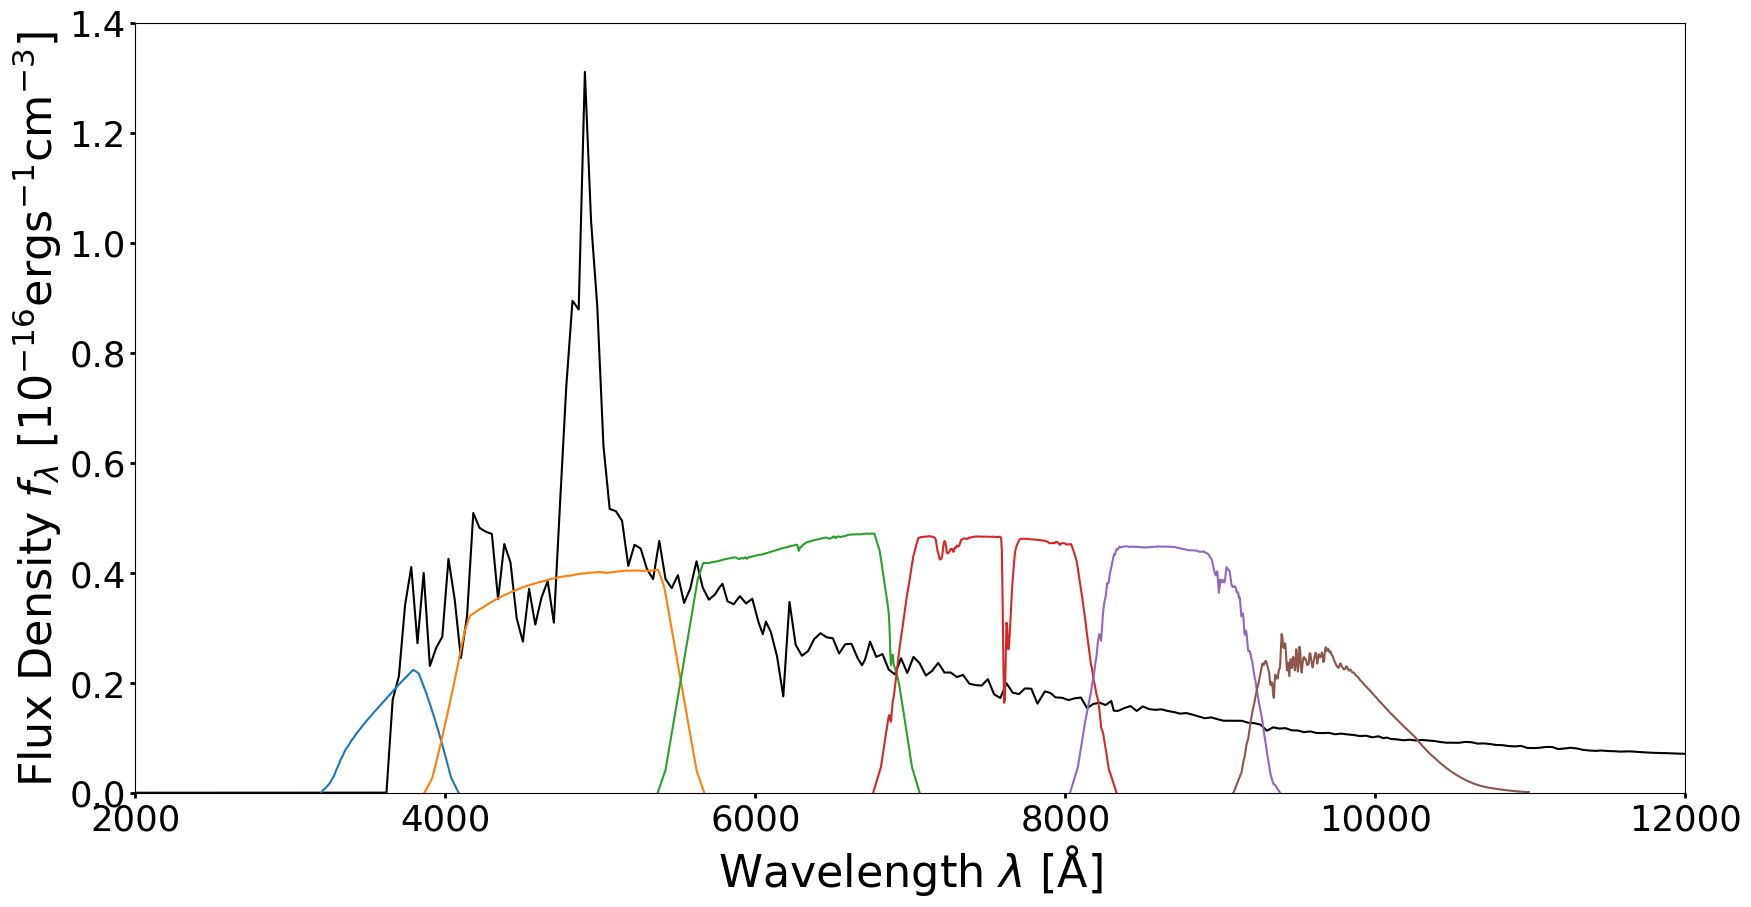

In [6]:
spectrum = simulate_sed(sps_model, sps_params)
plot_sed(spectrum, scaley = 16, xmin=2000, xmax=12000, ymin=0,
          ymax=1.4, xsize=20, ysize=10, 
         fontsize=32, log=False, c = 'k')
plot_lsst_filters(factor=1)